In [2]:
from flightForge import Environment, Motor, Rocket, Simulation, LivePlotter, Parachute

In [ ]:
env = Environment()

motor = Motor("curves/thrust(2).csv", 4.2, 9, 1.8, mass_ot="curves/mass.csv")

rocket = Rocket(40.8, "curves/MaCd.csv", 0.163)

rocket.add_parachute(Parachute("curves/drogue", 0.7354, 1, "apogee"))
rocket.add_parachute(Parachute("curves/main", 13.8991, 1, 450))

rocket.add_motor(motor)

sim = Simulation(env, rocket, 12, 84, 144, e_log = False)

TypeError: Simulation.__init__() got multiple values for argument 'e_log'

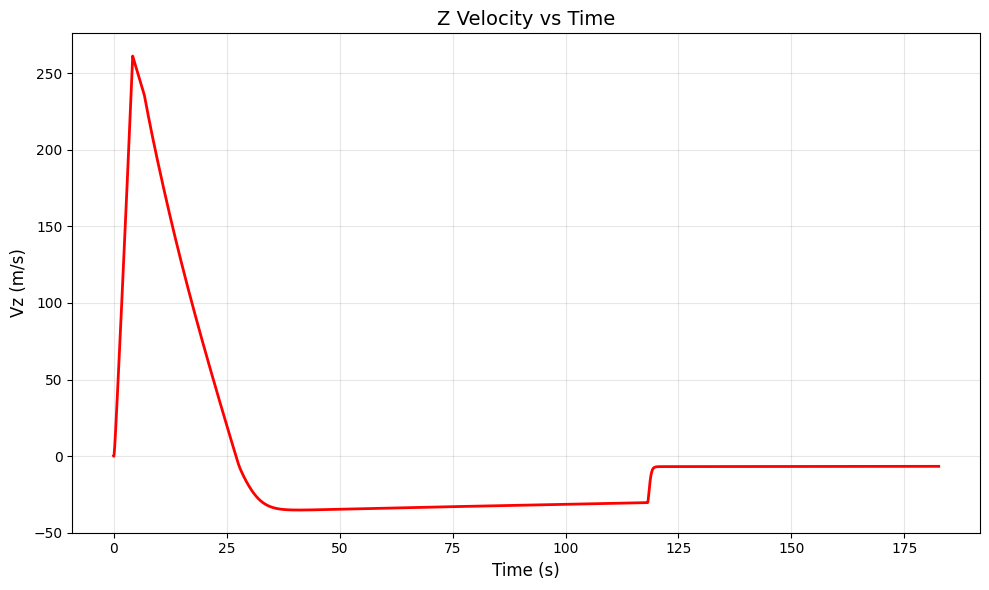

In [ ]:
sim.results.vz()

In [ ]:
sim.results.az()

NameError: name 'sim' is not defined